#### 1. Use *fig.add_[h/v]line()* and *fig.add_[h/v]rect()* to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of *flipper_length_mm* for each _species_ onto _plotly_ histograms of *flipper_length_mm* for each _species_ in the penguins dataset<br>

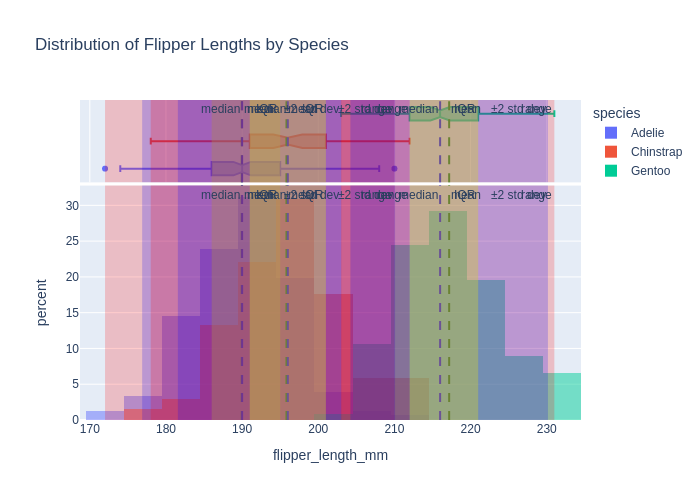

In [14]:
import pandas as pd
import plotly.express as px

# Load the data
penguins_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins_data = pd.read_csv(penguins_url)

# Clean data: remove rows with missing 'flipper_length_mm'
penguins_clean = penguins_data.dropna(subset=['flipper_length_mm'])

# Calculate necessary statistics
species_iqr = penguins_clean.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max',
    quantile_25=lambda x: x.quantile(0.25),
    quantile_75=lambda x: x.quantile(0.75)
)

# Create histograms
fig = px.histogram(penguins_clean, x="flipper_length_mm", color="species", barmode="overlay",
                   histnorm='percent', marginal="box", title="Distribution of Flipper Lengths by Species")

# Add statistical annotations
for species, row in species_iqr.iterrows():
    fig.add_vline(x=row['mean'], line_dash="dash", line_color="green", annotation_text="mean", annotation_position="top right")
    fig.add_vline(x=row['median'], line_dash="dash", line_color="blue", annotation_text="median", annotation_position="top left")
    fig.add_vrect(x0=row['min'], x1=row['max'], fillcolor="red", opacity=0.2, annotation_text="range", line_width=0)
    fig.add_vrect(x0=row['quantile_25'], x1=row['quantile_75'], fillcolor="yellow", opacity=0.4, annotation_text="IQR", line_width=0)
    std2_start = row['mean'] - 2 * row['std']
    std2_end = row['mean'] + 2 * row['std']
    fig.add_vrect(x0=std2_start, x1=std2_end, fillcolor="blue", opacity=0.2, annotation_text="±2 std dev", line_width=0)

# Show the plot
fig.show(renderer="png")


#### 2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using _seaborn_ **kernel density estimation** (KDE) plots to produce the desired figures organized in row of three plots<br>


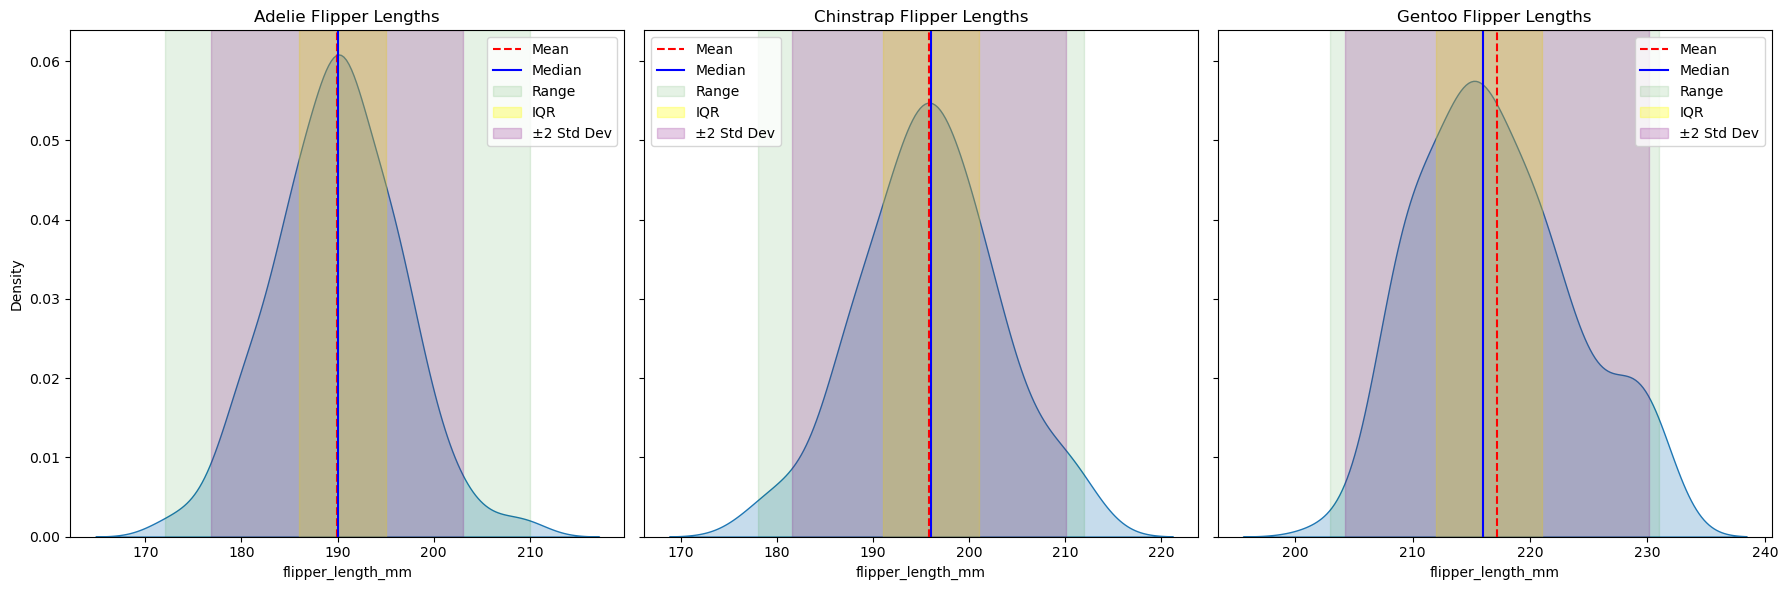

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
penguins_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins_data = pd.read_csv(penguins_url)

# Remove rows with missing 'flipper_length_mm'
penguins_clean = penguins_data.dropna(subset=['flipper_length_mm'])

# Convert 'flipper_length_mm' to float using loc to avoid SettingWithCopyWarning
penguins_clean.loc[:, 'flipper_length_mm'] = penguins_clean['flipper_length_mm'].astype(float)

# Calculate statistics for each species
species_iqr = penguins_clean.groupby('species')['flipper_length_mm'].agg(
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max',
    quantile_25=lambda x: x.quantile(0.25),
    quantile_75=lambda x: x.quantile(0.75)
)

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Create a KDE plot for each species
for i, species in enumerate(penguins_clean['species'].unique()):
    ax = axes[i]
    species_data = penguins_clean[penguins_clean['species'] == species]
    sns.kdeplot(data=species_data, x="flipper_length_mm", ax=ax, fill=True)
    ax.set_title(f'{species} Flipper Lengths')
    
    # Annotate statistics
    ax.axvline(species_iqr.loc[species, 'mean'], color='red', linestyle='--', label='Mean')
    ax.axvline(species_iqr.loc[species, 'median'], color='blue', linestyle='-', label='Median')
    ax.axvspan(species_iqr.loc[species, 'min'], species_iqr.loc[species, 'max'], alpha=0.1, color='green', label='Range')
    ax.axvspan(species_iqr.loc[species, 'quantile_25'], species_iqr.loc[species, 'quantile_75'], alpha=0.3, color='yellow', label='IQR')
    std2_start = species_iqr.loc[species, 'mean'] - 2 * species_iqr.loc[species, 'std']
    std2_end = species_iqr.loc[species, 'mean'] + 2 * species_iqr.loc[species, 'std']
    ax.axvspan(std2_start, std2_end, alpha=0.2, color='purple', label='±2 Std Dev')
    
    # Add legend
    ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


chatbot summary:In this session, you sought assistance with visualizing statistical data for the flipper lengths of penguin species using different Python libraries. Here’s a breakdown of how the session unfolded:

1. Plotly Visualization**: Initially, you requested to create histograms using Plotly to depict the distribution of flipper lengths for different penguin species, along with annotations for statistical measures like mean, median, range, interquartile range, and ±2 standard deviations. We encountered technical issues during this process, including difficulties in displaying the Plotly graphs due to connection errors.

2. Switch to Seaborn for KDE Plots**: After facing challenges with Plotly, you shifted focus to generating Kernel Density Estimation (KDE) plots using Seaborn. You wanted these plots to be organized in a row of three, each representing a different species, with similar statistical annotations as before. During this process, we ran into several errors, including data type issues and handling of NaN values, which caused the plots to fail.

3. Addressing Code Issues and Warnings**: To resolve the issues, we ensured the data types were correctly formatted and handled any NaN or infinite values. Despite these adjustments, persistent errors related to data processing in Seaborn prompted a suggestion to run the code locally after ensuring all libraries were up-to-date to potentially bypass the compatibility or configuration issues observed here.

4. Code Explanation**: You asked for detailed explanations of each part of the final code snippet. I provided comprehensive comments to help you understand the functionality and purpose of each section of the code, focusing on data cleaning, statistical calculations, and plotting with annotations.

The session involved iterative troubleshooting and adaptations of the approach, moving from one visualization library to another and dealing with technical constraints. The final advice was to execute the revised and well-commented code locally to avoid environment-specific issues and ensure the visualizations meet the specified requirements.

Chat link: https://chatgpt.com/share/66f61538-7354-8009-9f13-35705a09480a

#### 3. Search online for some images of **box plots**, **histograms**, and **kernel density estimators** (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference<br>


Graph links: https://www.google.com/imgres?q=pro%20and%20cons%20for%20histogram&imgurl=https%3A%2F%2Fjavatpoint-images.s3.eu-north-1.amazonaws.com%2Fblog%2Fimages%2Fadvantages-and-disadvantages-of-histogram.jpg&imgrefurl=https%3A%2F%2Fwww.javatpoint.com%2Fadvantages-and-disadvantages-of-histogram&docid=YPoECWlaK5QnPM&tbnid=DyRo6DNlQJYVPM&vet=12ahUKEwiv_IKKjOKIAxUDmokEHRKpHi8QM3oECBwQAA..i&w=474&h=385&hcb=2&ved=2ahUKEwiv_IKKjOKIAxUDmokEHRKpHi8QM3oECBwQAA
https://www.google.com/imgres?q=kernel%20density%20estimation&imgurl=https%3A%2F%2Fmiro.medium.com%2Fv2%2Fresize%3Afit%3A1400%2F1*NW99bn4V-dGQa1D1xapTtQ.png&imgrefurl=https%3A%2F%2Ftowardsdatascience.com%2Fkernel-density-estimation-explained-step-by-step-7cc5b5bc4517&docid=oMHQx3ZfTM5LlM&tbnid=5uPQJGd0kGvA2M&vet=12ahUKEwiZ3dqrjOKIAxUplYkEHXN_MtsQM3oECBkQAA..i&w=1400&h=621&hcb=2&ved=2ahUKEwiZ3dqrjOKIAxUplYkEHXN_MtsQM3oECBkQAA
https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplypsychology.org%2Fboxplots.html&psig=AOvVaw37heIJP_cVdUcIzCHrB11a&ust=1727491215822000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCNDf6rOM4ogDFQAAAAAdAAAAABAE

chatbot summary: In our session today, we discussed various types of data visualization techniques, specifically focusing on histograms, box plots, and kernel density estimation (KDE). You shared your perspectives on the strengths and weaknesses of each method:

1. **Histograms** are excellent for visualizing frequency distributions and identifying modes, but they lack specificity in showing individual data points and can be sensitive to bin sizes.

2. **Box Plots** efficiently summarize data through a five-number summary and are effective at highlighting outliers. You mentioned a preference for box plots, appreciating their ability to include all data values and handle both symmetrical and asymmetrical datasets. Their clarity in labeling various components makes them suitable for further analysis.

3. **Kernel Density Estimation (KDE)** provides a smooth overview of data distribution, ideal for large datasets. However, it represents an estimation rather than actual data points, requiring careful choice of parameters like bandwidth.

You expressed a clear preference for box plots, noting their utility in encapsulating comprehensive data insights, including outliers, and their adaptability to both types of data symmetry. This preference has been noted for future discussions.

The session encapsulated a thorough comparison of these visualization tools, helping to clarify their appropriate applications based on your analytical needs and preferences.

Chatbot link: https://chatgpt.com/share/66f61a75-cd08-8009-b391-d32335ffed01

#### 4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions

1. Which datasets have similar means and similar variances
2. Which datasets have similar means but quite different variances
3. Which datasets have similar variances but quite different means
4. Which datasets have quite different means and quite different variances
    

1. Data 1 and data 3 have similar means and similar variances.
2. Data 2 has similar means but quit different variances with data 1 and 3.
3. Data 2 and 4 have similar variances but different means.
4. Data 4 have quite different means and quit different variances with data 1 and data 3.

#### 6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data<br>

In [43]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns




,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [44]:
df.describe()
df.isnull()

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,False,False,False,True,False,True,False,True,True,True,...,False,True,False,True,True,False,True,True,True,True
746,False,False,False,True,False,True,False,True,True,True,...,False,True,False,True,True,False,True,True,True,True
747,False,False,False,True,False,True,False,True,True,True,...,False,True,False,True,True,False,True,True,True,True
748,False,False,False,True,False,True,False,True,True,True,...,False,True,False,True,True,False,True,True,True,True


In [ ]:
df.describe()

In [ ]:
import plotly.express as px
px.histogram(x='restaurant id',y='calories')
px.bar
px.box

Summary: 
1. The first step is to identify the source of the data set. This time, the dataset is provided, and the data is collected from different restaurants.
2. I identify the data structure. This time, the data was collected both numerically and categorically.
3. Data cleaning: Yes, some values are missing.
4. Visualizing and calculating: We are supposed to calculate the mean, standard deviation and median of the data set and then use graphs such as px. b ox to represent the data. This time, I prefer to use a box graph since this is a large data set and a box graph would clearly show the range of the data and also its characteristics.